## open file

[kaggle data link](https://www.kaggle.com/competitions/spaceship-titanic)

In [ ]:
import pandas as pd
import warnings
import os
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
folder_path = '/content/drive/MyDrive/'
data_path = os.path.join(folder_path,'kaggle','spaceship-titanic','data')
train_path = os.path.join(data_path,'finish_train.csv')
test_path = os.path.join(data_path,'finish_test.csv')
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [ ]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process, model_selection
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from tqdm import tqdm
import xgboost as xgb
import lightgbm as lgb

In [ ]:
X = train[train.columns.difference(['Transported'])].values
y = train['Transported'].astype(int).values
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(test[test.columns.difference(['Transported'])].values)

## models evaluation

In [ ]:
MLA = [
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    # svm.SVC(probability=True),
    # svm.NuSVC(probability=True),
    neighbors.KNeighborsClassifier(),
    naive_bayes.BernoulliNB(),
    # gaussian_process.GaussianProcessClassifier(),
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    ensemble.RandomForestClassifier(),
    xgb.XGBClassifier(),
    lgb.LGBMClassifier()
    ]

In [ ]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

MLA_columns = ['model', 'parameters','train accuracy mean', 'test accuracy mean', 'test accuracy 3*STD' ,'operation time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
train['Transported'] = train['Transported'].astype(int)


row_index = 0
for alg in MLA:
  MLA_name = alg.__class__.__name__
  MLA_compare.loc[row_index,'model'] = MLA_name
  MLA_compare.loc[row_index,'parameters'] = str(alg.get_params())

  cv_results = model_selection.cross_validate(alg, X , y, cv  = cv_split, return_train_score=True)
  MLA_compare.loc[row_index,'train accuracy mean'] = cv_results['train_score'].mean()
  MLA_compare.loc[row_index,'test accuracy mean'] = cv_results['test_score'].mean()
  MLA_compare.loc[row_index,'test accuracy 3*STD'] = cv_results['test_score'].std()*3
  MLA_compare.loc[row_index,'operation time'] = cv_results['fit_time'].mean()
  row_index+=1

In [ ]:
MLA_compare.sort_values(by = ['test accuracy mean'], ascending = False, inplace = True)
MLA_compare.reset_index(drop=True, inplace=True)
MLA_compare

,model,parameters,train accuracy mean,test accuracy mean,test accuracy 3*STD,operation time
0,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",0.897483,0.807476,0.022318,0.307101
1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",1.0,0.80276,0.02772,1.187648
2,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",0.946232,0.800863,0.029681,1.448115
3,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.820305,0.796032,0.02344,11.167311
4,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.793845,0.789534,0.024868,1.158894
5,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.800388,0.786544,0.026195,14.974941
6,SGDClassifier,"{'alpha': 0.0001, 'average': False, 'class_wei...",0.783319,0.778838,0.031896,0.078958
7,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.895154,0.777573,0.018561,111.675983
8,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",0.777941,0.773778,0.023006,0.031677
9,LinearDiscriminantAnalysis,"{'covariance_estimator': None, 'n_components':...",0.777883,0.773778,0.022416,0.078922


In [ ]:
ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
answer = []

for alg in MLA:
  MLA_name = alg.__class__.__name__
  print(MLA_name + ' training...')
  alg_df = []

  for i, (train_index, test_index) in enumerate(ss.split(X, y)):
    # print('fold no.'+str(i+1))
    X_train, X_test = X[train_index], X[test_index]
    y_train,y_test = y[train_index], y[test_index]
    model = alg
    model.fit(X_train,y_train)
    predicted = model.predict(X_test)
    # print(accuracy_score(y_test, predicted))
    MLA_predict = train['Transported'].astype(int)[test_index].rename('answer').to_frame()
    MLA_predict[MLA_name+'_'+str(i+1)] = predicted
    alg_df.append(MLA_predict)
  answer.append(alg_df)

In [ ]:
all = []
for j in range(5):        # k-fold
  fold = []
  for i in range(len(MLA)):
    df = answer[i][j]
    fold.append(df)
  all.append(fold)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [ ]:
def correlation_heatmap(df):
  _ , ax = plt.subplots(figsize =(14, 12))
  colormap = sns.diverging_palette(220, 10, as_cmap = True) # 顏色設定

  _ = sns.heatmap(
      df.corr(),
      cmap = colormap,
      square=True,
      cbar_kws={'shrink':.9 },   # color bar size
      ax=ax,
      annot=True,          # number label
      linewidths=0.1, vmax=1.0, linecolor='white', # 邊框
      annot_kws={'fontsize': 5 }  # number size
  )

  plt.title('Pearson Correlation of Features', y=1.05, size=15)

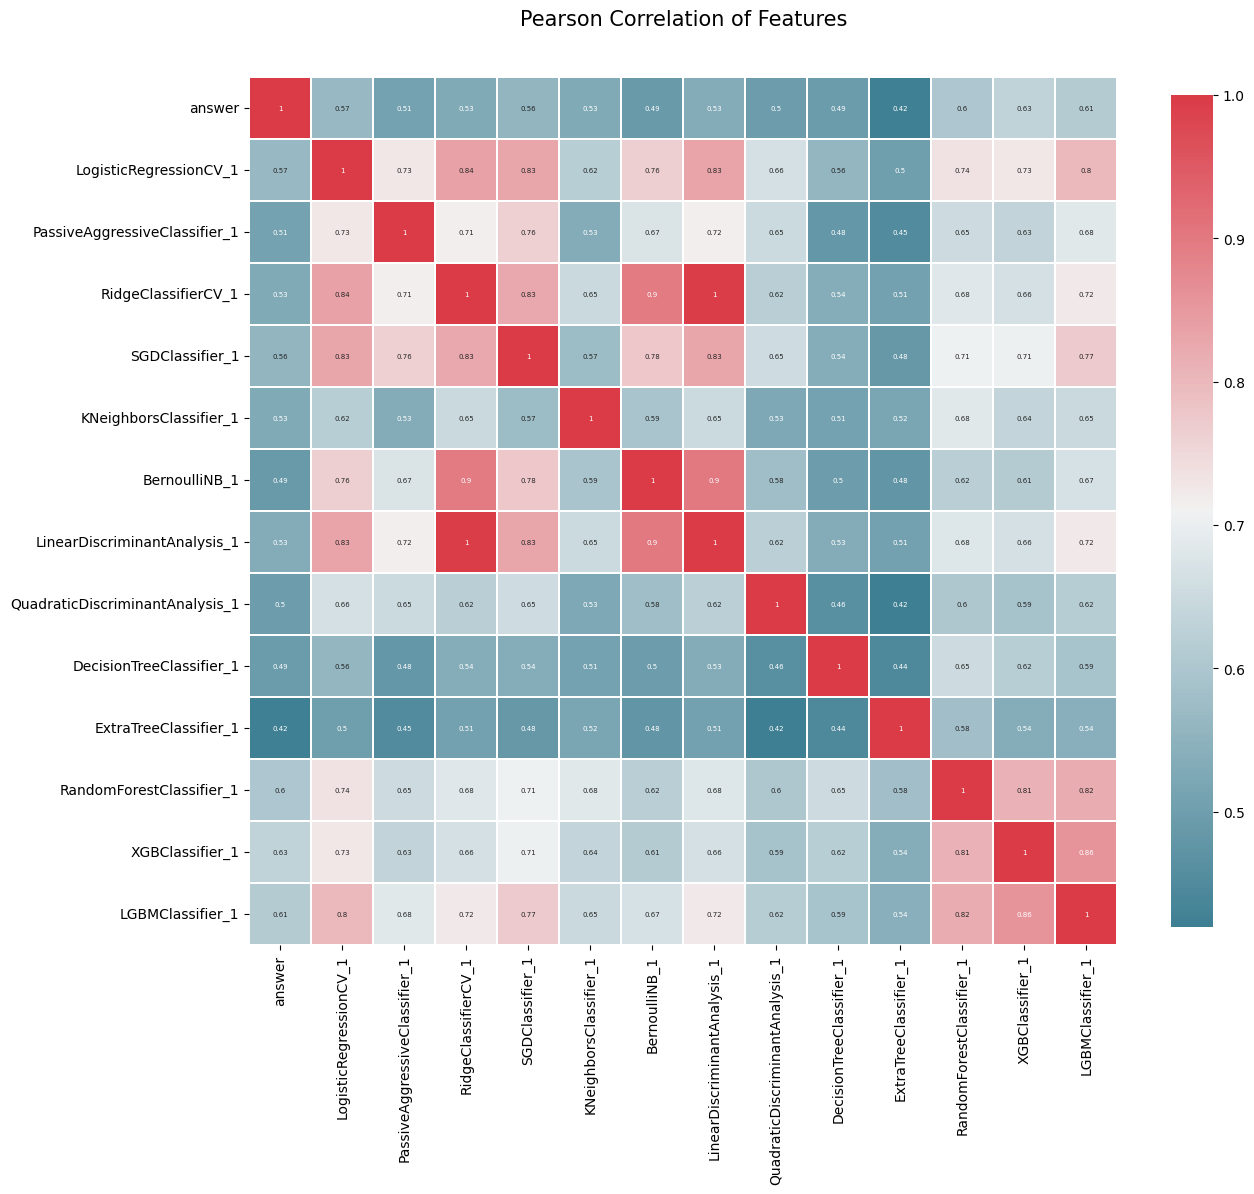

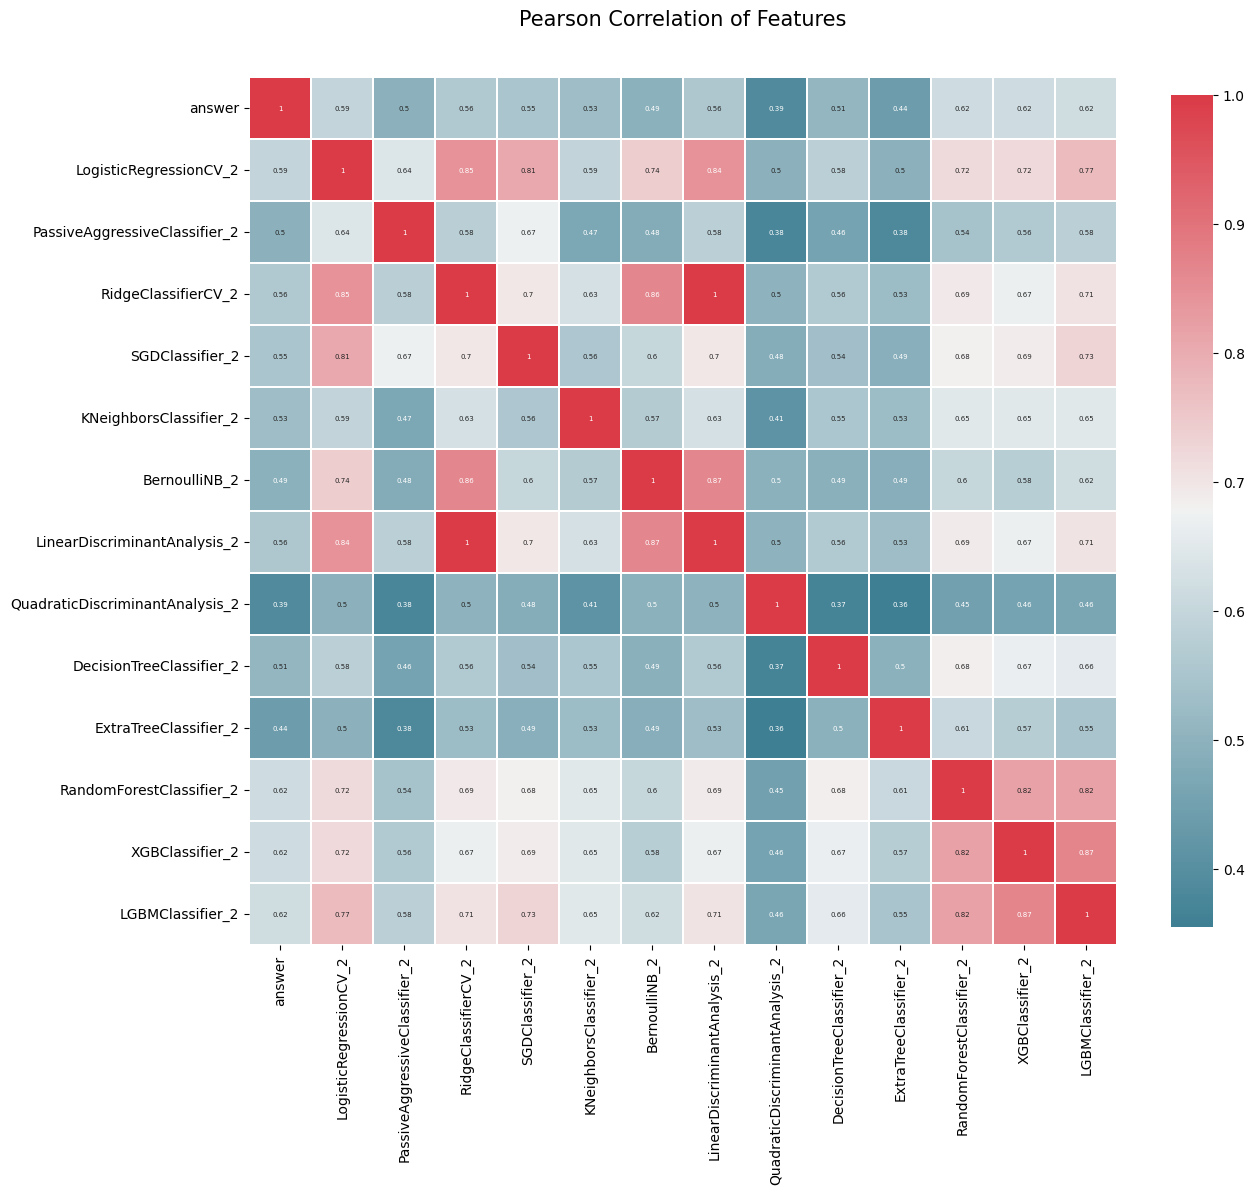

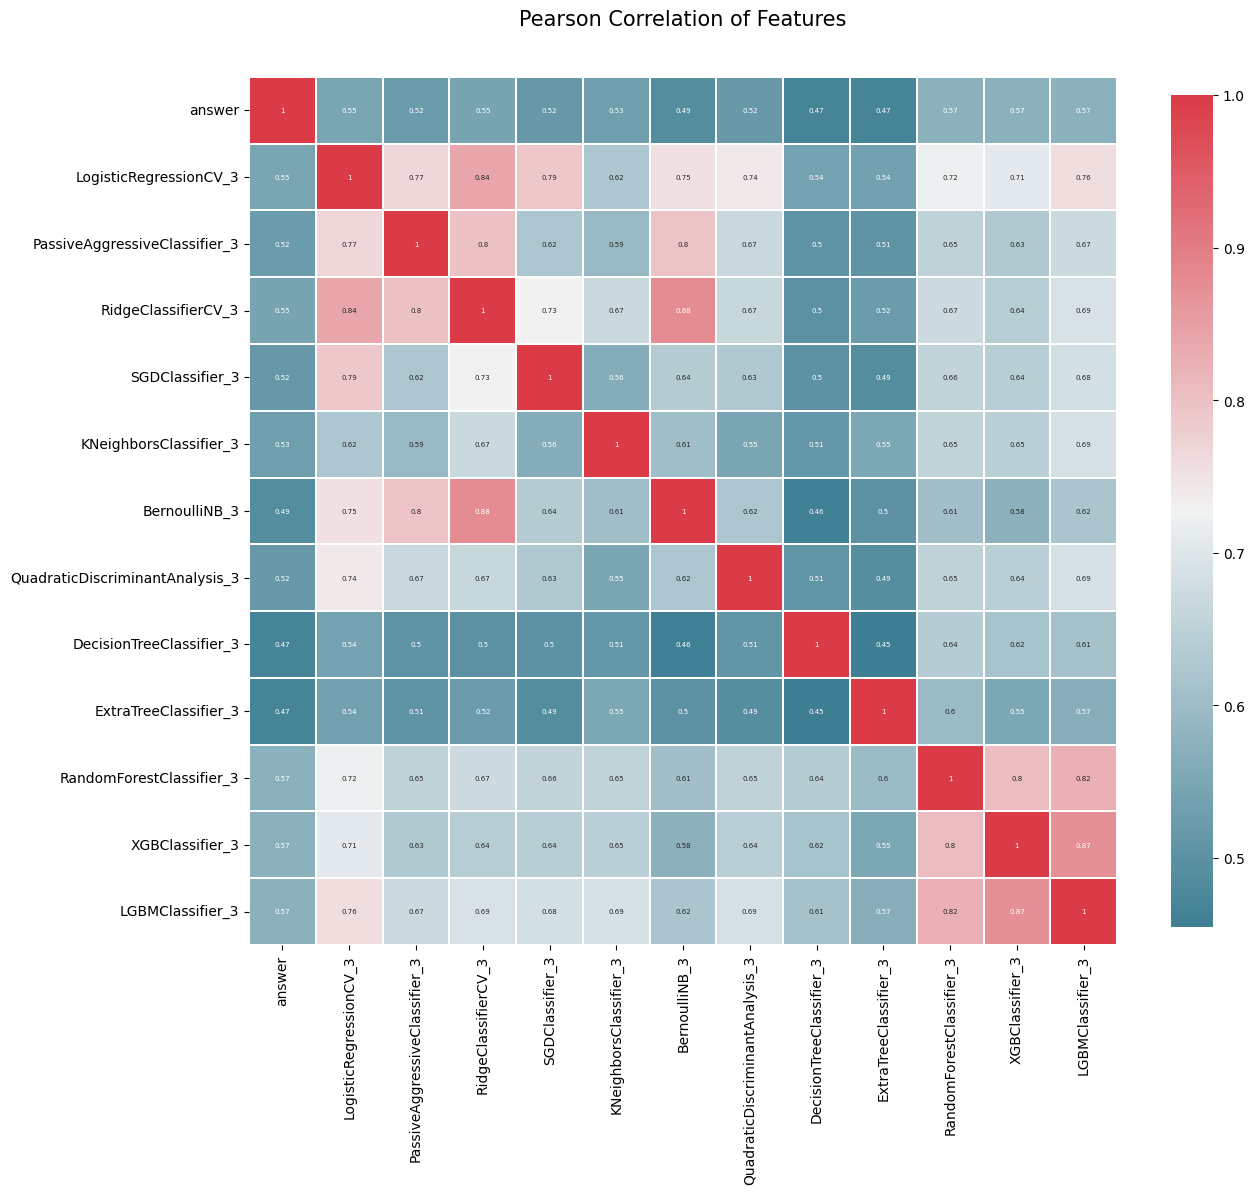

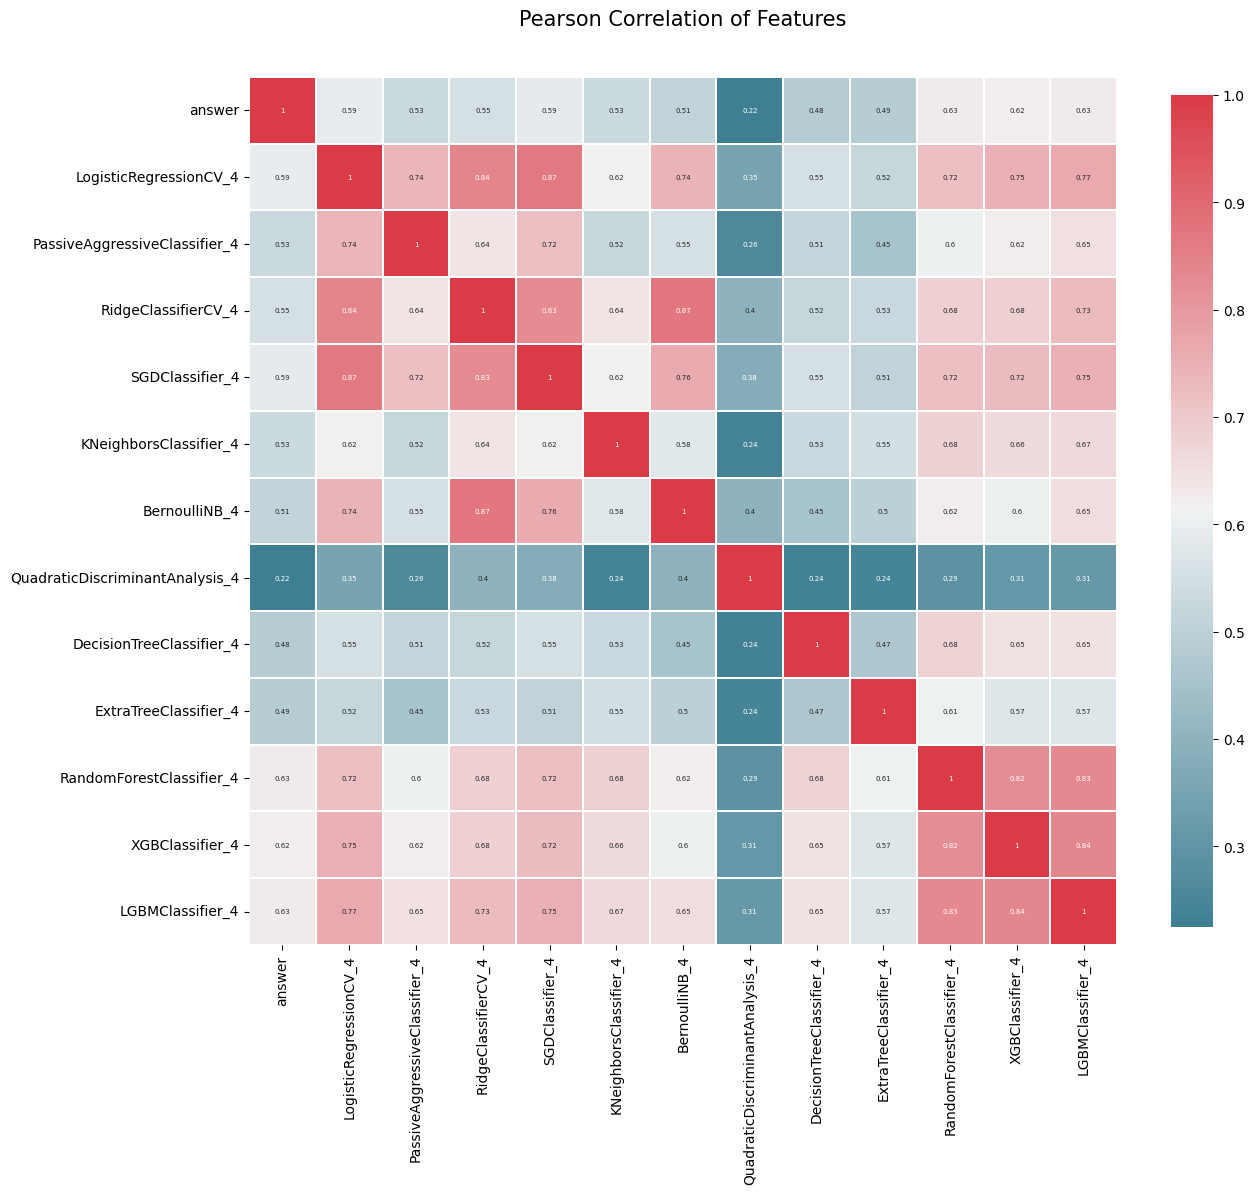

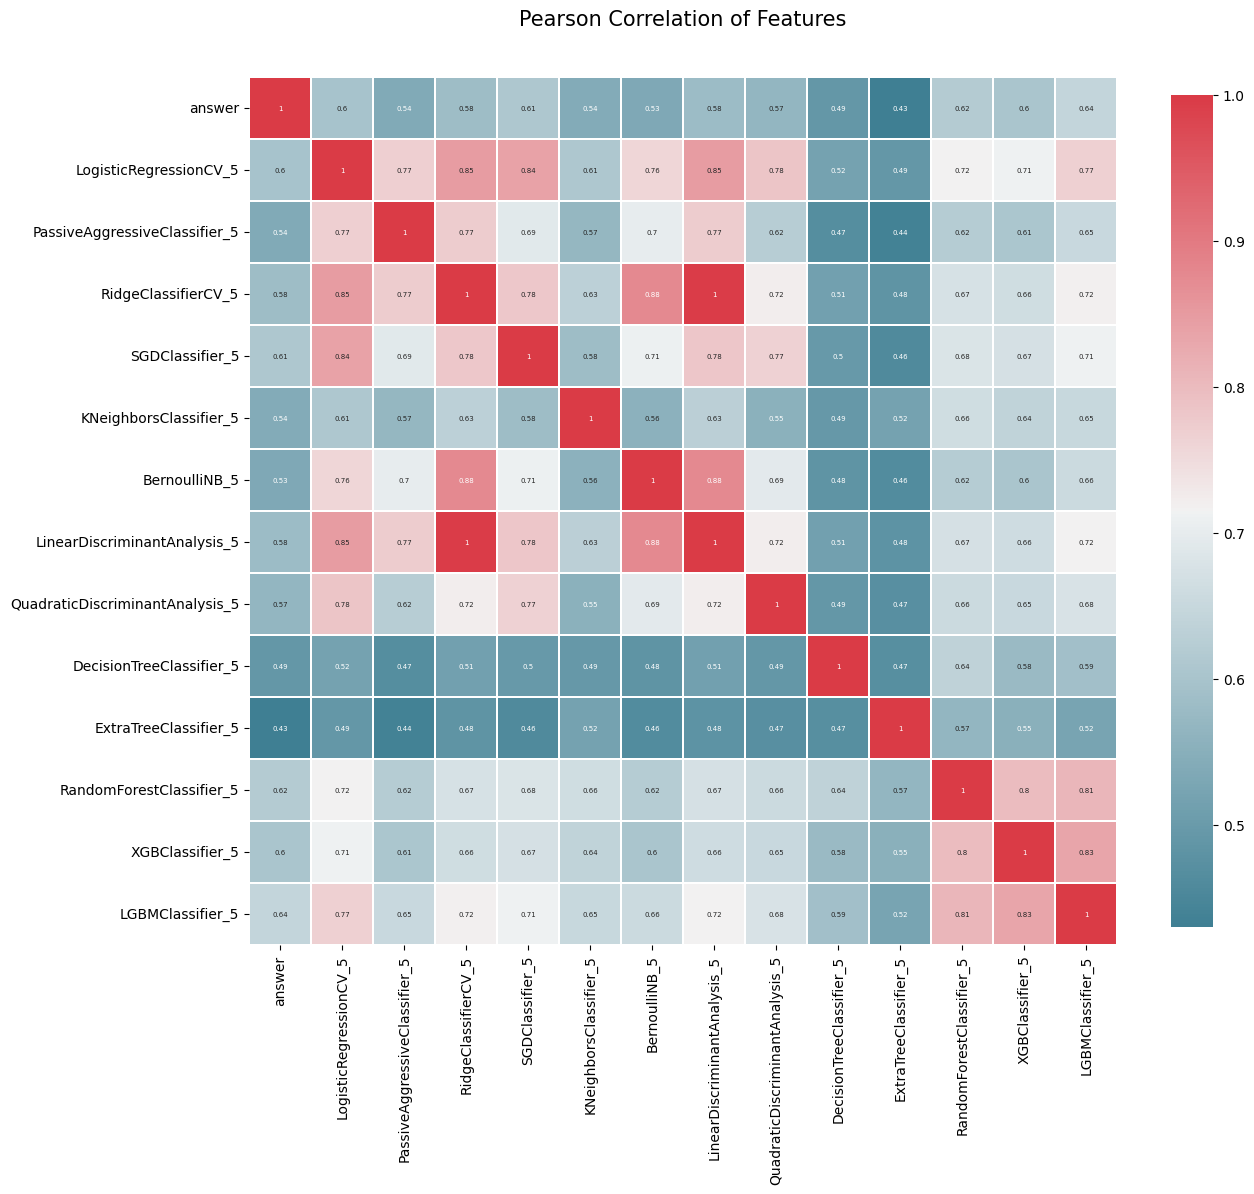

In [ ]:
for i in range(len(all)):
  df = pd.concat(all[i], axis='columns')
  df = df.T.drop_duplicates().T
  df['repeat'] = df.drop('answer',axis=1).sum(axis=1)
  correlation_heatmap(df.drop('repeat',axis=1))